In [1]:
%matplotlib inline
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import pandas

# Bezier曲線

## Bezier曲線の定義

制御点を$\vec{B}_i (0\leq i \leq N-1)$とすると、Bezier曲線は

$$
\vec{P(t)} = \sum_i^{N-1} \vec{B}_i J_{(N-1),i}(t)
$$

と表される。ここで、
$$
J_{n,i}(t) = {}_n C_i t^i (1-t)^{n-i}
$$
である。

In [2]:
from scipy.misc import comb
def J(n, i, t):
    return comb(n, i) * t**i * (1-t)**(n-i)

In [3]:
def Bezier(t, B):
    N = len(B)
    
    Jmtx = np.array([J(N-1, i, t) for i in range(N)])
    return np.dot(Jmtx, B)

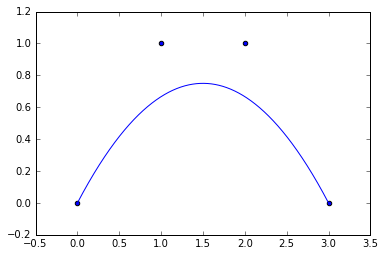

In [4]:
B = np.array([
        [0, 0], [1, 1], [2, 1], [3, 0]
    ])
ts = np.linspace(0, 1, 1000)
p = np.array([Bezier(t, B) for t in ts])
plt.plot(p[:,0], p[:,1])
plt.scatter(B[:,0], B[:,1])

## フィッティング

適当にフィッティングしてみる。`scipy.optimize.curve_fit`に制御点の座標をパラメータとして入れる。

### フィッティング対象

$$
y = \sqrt x
$$

In [5]:
xdata = np.linspace(0, 1, 100)
ydata = np.sqrt(xdata)
data = np.array([xdata, ydata]).T

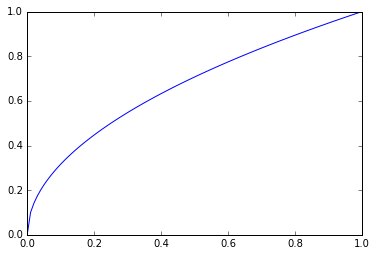

In [6]:
plt.plot(data[:,0], data[:,1])

### fitting

In [7]:
def func_res(params, x, y):
    params = np.array(params)
    B = params.reshape(len(params)//2, 2)
    N = len(B)
    curve = np.array([Bezier(t, B) for t in x])
    d = curve - np.array([x, y]).T
    return d.reshape(1, d.shape[0]*d.shape[1])[0,:]

In [8]:
from scipy import optimize

N = 10    # control pointの数
p0 = np.array(list(range(N*2)))
param, _ = optimize.leastsq(func_res, p0, args=(xdata, ydata))
B = param.reshape(len(param)//2, 2)

In [9]:
B

array([[  1.31054397e-09,   2.31832855e-02],
       [  1.11111107e-01,   7.20943527e-01],
       [  2.22222230e-01,  -2.63575537e-01],
       [  3.33333319e-01,   1.80233226e+00],
       [  4.44444464e-01,  -6.92237679e-01],
       [  5.55555536e-01,   1.84650208e+00],
       [  6.66666680e-01,   2.24133997e-01],
       [  7.77777773e-01,   1.09769536e+00],
       [  8.88888890e-01,   9.01616839e-01],
       [  1.00000000e+00,   1.00313159e+00]])

In [10]:
ts = np.linspace(0, 1, 100)
curve = np.array([Bezier(t, B) for t in ts])

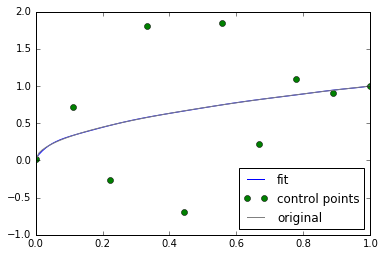

In [11]:
plt.plot(curve[:,0], curve[:,1], label="fit")
plt.plot(B[:,0], B[:,1], "o", label="control points")
plt.plot(data[:,0], data[:,1], label="original", color="gray")

plt.legend(loc="lower right")